In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Subplot Plotting Practice

In [17]:
x1 = np.linspace(-1, 1, 400)
y1 = np.linspace(-1, 1, 400)
X1, Y1 = np.meshgrid(x1, y1)

Z1 = np.sin(X1 * Y1) * np.sin(1 - (9 * X1)**2 + (9 * Y1)**2) / 9

inner = 0.4**2 - (0.6 - np.sqrt(X1**2 + Y1**2))**2
Z2 = np.full_like(X1, np.nan)
Z2[inner >= 0] = np.sqrt(inner[inner >= 0])

x3 = np.linspace(-1, 1, 400)
y3 = np.linspace(-0.99, 1, 400)
X3, Y3 = np.meshgrid(x3, y3)
Z3 = np.tanh(5 * X3) / (Y3 + 0.1)

Z4 = np.exp(-5 * ((X1 - 0.2)**2 + (Y1 + 0.3)**2))

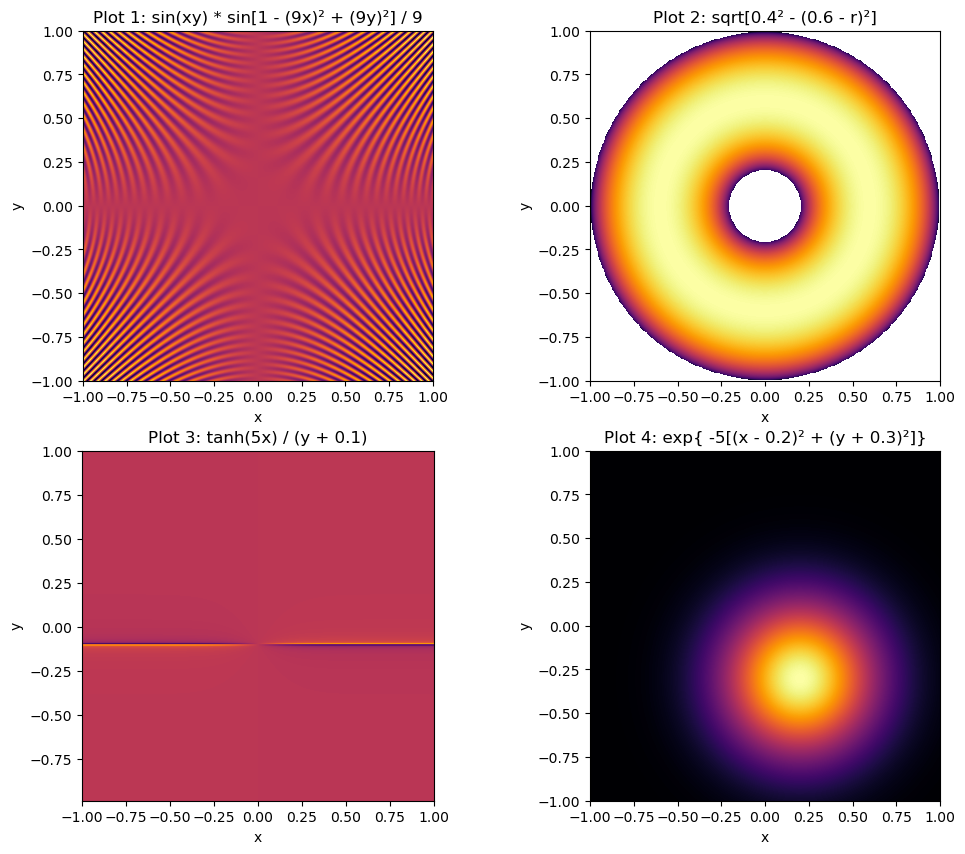

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
cmap = 'inferno'

im1 = axs[0, 0].imshow(Z1, extent=[-1, 1, -1, 1], origin='lower', cmap=cmap)
axs[0, 0].set_title("Plot 1: sin(xy) * sin[1 - (9x)² + (9y)²] / 9")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("y")

im2 = axs[0, 1].imshow(Z2, extent=[-1, 1, -1, 1], origin='lower', cmap=cmap)
axs[0, 1].set_title("Plot 2: sqrt[0.4² - (0.6 - r)²]")
axs[0, 1].set_xlabel("x")
axs[0, 1].set_ylabel("y")

im3 = axs[1, 0].imshow(Z3, extent=[-1, 1, -0.99, 1], origin='lower', cmap=cmap)
axs[1, 0].set_title("Plot 3: tanh(5x) / (y + 0.1)")
axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("y")

im4 = axs[1, 1].imshow(Z4, extent=[-1, 1, -1, 1], origin='lower', cmap=cmap)
axs[1, 1].set_title("Plot 4: exp{ -5[(x - 0.2)² + (y + 0.3)²]}")
axs[1, 1].set_xlabel("x")
axs[1, 1].set_ylabel("y")

plt.show()

Plot 1: This plot shows a wave interference pattern due to the product of sine functions. It has a complex and oscillatory pattern with symmetry and repeating lobes like a standing wave.

Plot 2: The function produces a circular ring or disc-like shape. The shape looks like a donut or a lens, with a smooth peak and clean boundary.

Plot 3: This one shows a sharp change along the x-direction because of the hyperbolic tangent. Along the y-direction, the values stretch or compress due to division.

Plot 4: This is a smooth 2D Gaussian "bump" centered at (0.2, -0.3). The values decay rapidly away from the center like a heat spot or probability distribution peak.

## 2) Random Plotting Practice

In [21]:
np.random.seed(0)
list1 = np.random.randint(0, 201, size=50)
list2 = np.random.randint(0, 201, size=50)
list3 = np.random.randint(0, 201, size=50)

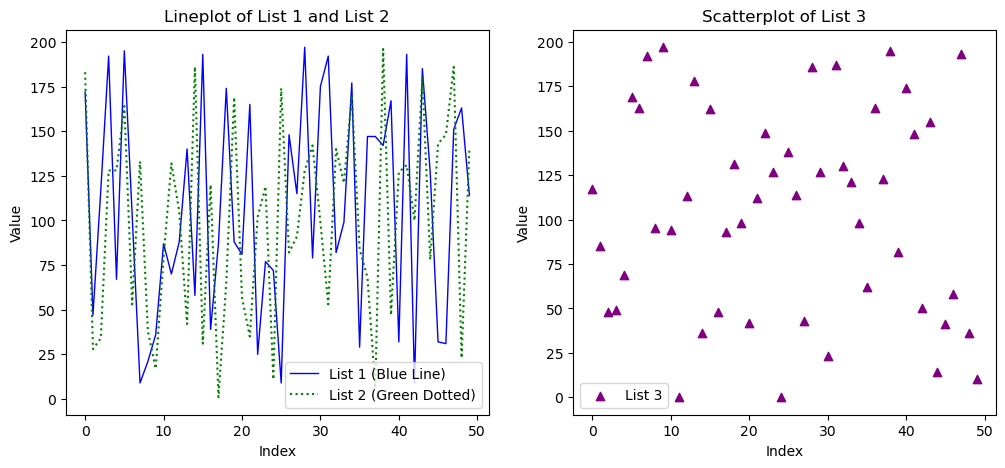

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(list1, color="blue", linewidth=1, label="List 1 (Blue Line)")
ax1.plot(list2, color="green", linestyle=":", label="List 2 (Green Dotted)")
ax1.set_title("Lineplot of List 1 and List 2")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")
ax1.legend()

x_vals = np.arange(len(list3))
ax2.scatter(x_vals, list3, color="purple", marker="^", label="List 3")
ax2.set_title("Scatterplot of List 3")
ax2.set_xlabel("Index")
ax2.set_ylabel("Value")
ax2.legend()

plt.show()

## 3) Monte Carlo

Did you know that you can estimate the value of $\pi$ using random numbers? Crazy statement but really cool.

First, you need to generate a large number of random points inside a 1x1 square with one corner at the origin (essentially you are making a unit circle).

Second, check how many of these points fall within a distance of 1 from the origin (in other words, a radius = 1). These points will lie inside a quarter circle, centered at the origin.

By using the ratio of points inside the quarter circle to the total number of points, we can estimate $\pi$! based on the relationship between the area of a quarter circle and the square.

Your task:
- Calculate an estimate of $\pi$ using this method of $N = 10, 10^3, 10^5, 10^6$. Print these results for each value of $N$. What do you notice as $N$ gets bigger?
- For $N=10^4$, plot the points within the quarter circle in one color and the points outside in another color. Make sure the entire plots is a square. Display the estimate value of $\pi$ on the plot. Don't forget to include a title and legend.


In [36]:
Ns = [10, 1000, 100000, 1000000]

for N in Ns:
    x = np.random.rand(N)
    y = np.random.rand(N)

inside = (x**2 + y**2) <= 1
pi_estimate = 4 * np.sum(inside) / N

print("N =", N, "→ estimated π =", pi_estimate)

N = 1000000 → estimated π = 3.142432


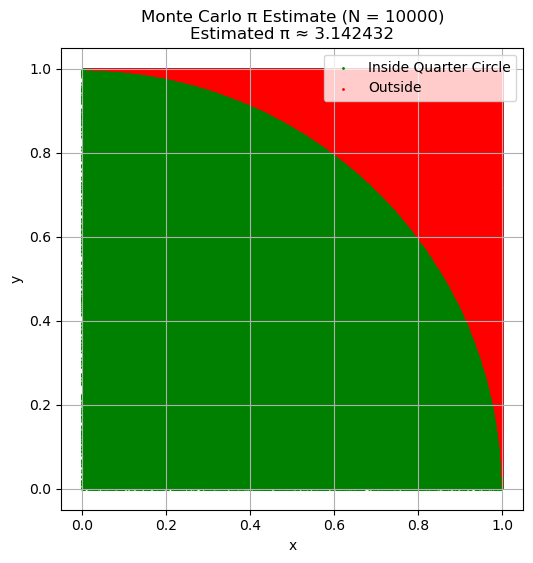

In [44]:
N = 10**4

plt.figure(figsize=(6, 6))
plt.scatter(x[inside], y[inside], color='green', s=1, label="Inside Quarter Circle")
plt.scatter(x[~inside], y[~inside], color='red', s=1, label="Outside")

plt.gca().set_aspect('equal')  # Keep the plot square
plt.title(f"Monte Carlo π Estimate (N = {N})\nEstimated π ≈ {pi_estimate:}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Point-Spread Function

*Based on Astro 120 curriculum.*

When telescopes look at very distant sources (like stars or galaxies), the light they capture should look like a point source (focused point of light, think of a dot) on the detector.

However, due to the diffraction-limit of a telescope, atmospheric turbulence and imperfections in an optical system, the star does not appear like a point. Rather, it becomes a blurry spot on the detector which we model with a **point-spread function** (PSF).

To better visualize what the above paragraph is talking about, you will simulate the transition from a point source to a point-spread function using a 2D Gaussian function.

We can represent a point source as a single bright pixel in an image.

There is an example point-source vs. point-spread function plot in the homework 9 folder.


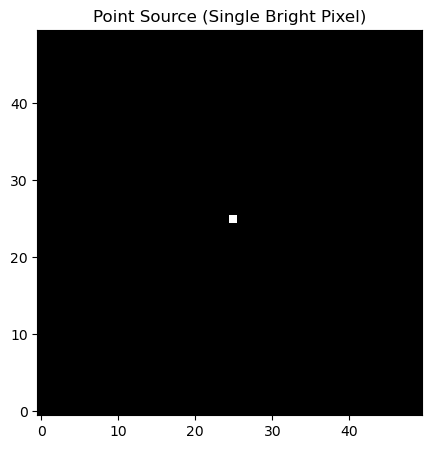

In [56]:
image = np.zeros((50, 50))
image[25, 25] = 1.0

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray', origin='lower')
plt.title("Point Source (Single Bright Pixel)")
plt.show()

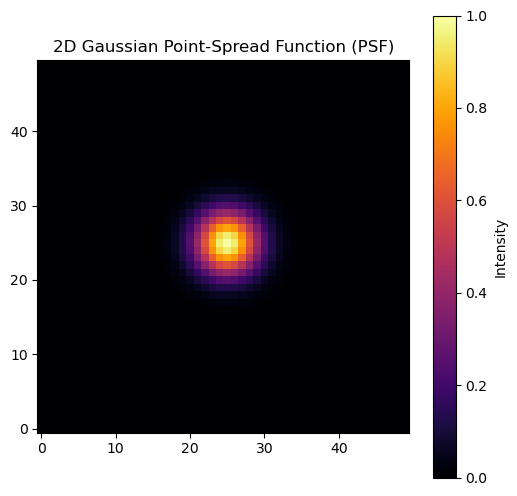

In [58]:
A = 1.0 
x0, y0 = 25, 25
sigma = 3

x = np.arange(0, 50)
y = np.arange(0, 50)
X, Y = np.meshgrid(x, y)

PSF = A * np.exp(-((X - x0)**2 + (Y - y0)**2) / (2 * sigma**2))

plt.figure(figsize=(6, 6))
plt.imshow(PSF, cmap='inferno', origin='lower')
plt.title("2D Gaussian Point-Spread Function (PSF)")
plt.colorbar(label="Intensity")
plt.show()

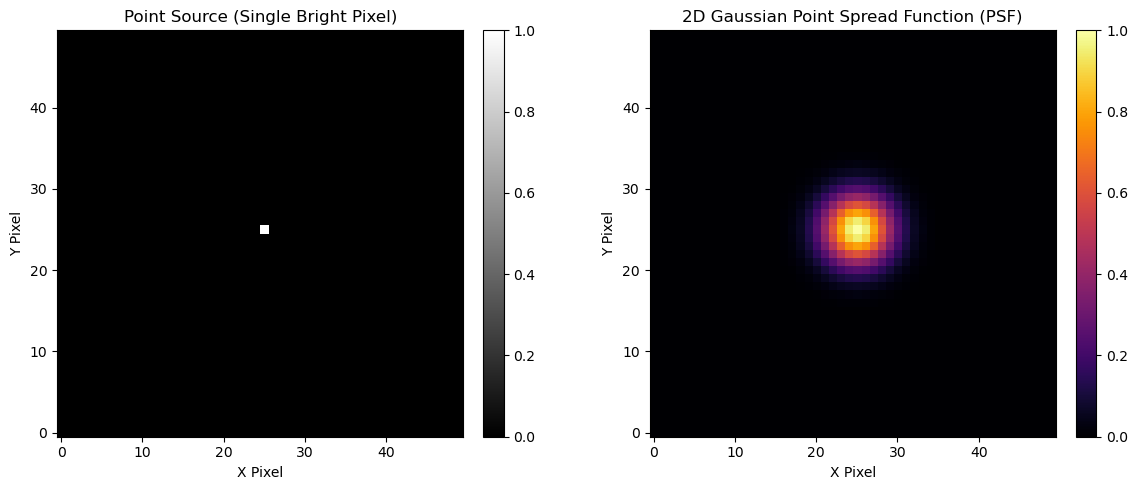

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

im1 = ax1.imshow(image, cmap='gray', origin='lower')
ax1.set_title("Point Source (Single Bright Pixel)")
ax1.set_xlabel("X Pixel")
ax1.set_ylabel("Y Pixel")
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

im2 = ax2.imshow(PSF, cmap='inferno', origin='lower')
ax2.set_title("2D Gaussian Point Spread Function (PSF)")
ax2.set_xlabel("X Pixel")
ax2.set_ylabel("Y Pixel")
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()